In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import re
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df = df[['posting_title','location','description','industries','job_function','seniority_level']]
df.dropna(inplace=True)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text
df['clean_description'] = df['description'].apply(clean_text)
print("\nCleaned Data Preview:")
df.head()

Saving linkedin_jobs_2025_11_13.csv to linkedin_jobs_2025_11_13.csv
Dataset Loaded Successfully!
Shape: (1035, 15)

Cleaned Data Preview:


,posting_title,location,description,industries,job_function,seniority_level,clean_description
0,Data Engineer,European Union,🌐 Freelance Data Engineer (Remote – Europe) 🌐\...,IT Services and IT Consulting,Information Technology,Mid-Senior level,freelance data engineer remote europe \ncont...
1,Junior Data Engineer,"Athens, Attiki, Greece",We are looking for two Junior to Mid-level Dat...,IT Services and IT Consulting,Other,Mid-Senior level,we are looking for two junior to midlevel data...
2,Junior Data Engineer,"Sofia, Sofia City, Bulgaria",Company Description\nExperian is a global data...,Financial Services,Information Technology and Engineering,Not Applicable,company description\nexperian is a global data...
3,Data Engineer (Senior),"Amsterdam, North Holland, Netherlands","About us:\n iconic brand, tiny company.\nPolar...",Photography,"Analyst, Engineering, and Information Technology",Mid-Senior level,about us\n iconic brand tiny company\npolaroid...
4,Data Engineer,"Lille, Hauts-de-France, France","KAPIA-RGI\n, est la filiale France du groupe \...","Software Development, IT Services and IT Consu...","Analyst, Consulting, and Engineering",Mid-Senior level,kapiargi\n est la filiale france du groupe \nr...


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
skills_list = [
    'python','java','c++','sql','machine learning','deep learning','data science',
    'artificial intelligence','tensorflow','pytorch','nlp','power bi','tableau',
    'excel','aws','azure','cloud','devops','docker','kubernetes','react','node',
    'html','css','javascript','flask','django','git','linux','spark','hadoop'
]
def extract_skills(text):
    extracted = []
    for skill in skills_list:
        if skill in text:
            extracted.append(skill)
    return extracted
df['extracted_skills'] = df['clean_description'].apply(extract_skills)

print("Sample extracted skills:")
df[['posting_title','extracted_skills']].head()


Sample extracted skills:


,posting_title,extracted_skills
0,Data Engineer,"[sql, aws, azure, cloud]"
1,Junior Data Engineer,"[sql, power bi, cloud]"
2,Junior Data Engineer,"[sql, power bi, tableau, excel, aws, cloud, gi..."
3,Data Engineer (Senior),"[python, sql, power bi, excel, aws, azure, clo..."
4,Data Engineer,"[python, java, sql, power bi, cloud, html, git]"


Trending Skills Analysis Code

In [ ]:

all_skills = [skill for sublist in df['extracted_skills'] for skill in sublist]
skill_counts = Counter(all_skills)
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill','Demand_Count'])
skill_df = skill_df.sort_values(by='Demand_Count', ascending=False)

print("Top 15 Trending Skills:")
skill_df.head(15)

Top 15 Trending Skills:


,Skill,Demand_Count
9,python,735
0,sql,617
6,excel,483
3,cloud,419
12,machine learning,391
7,git,349
17,data science,339
1,aws,337
2,azure,252
4,power bi,220


Visualize Trending Skills

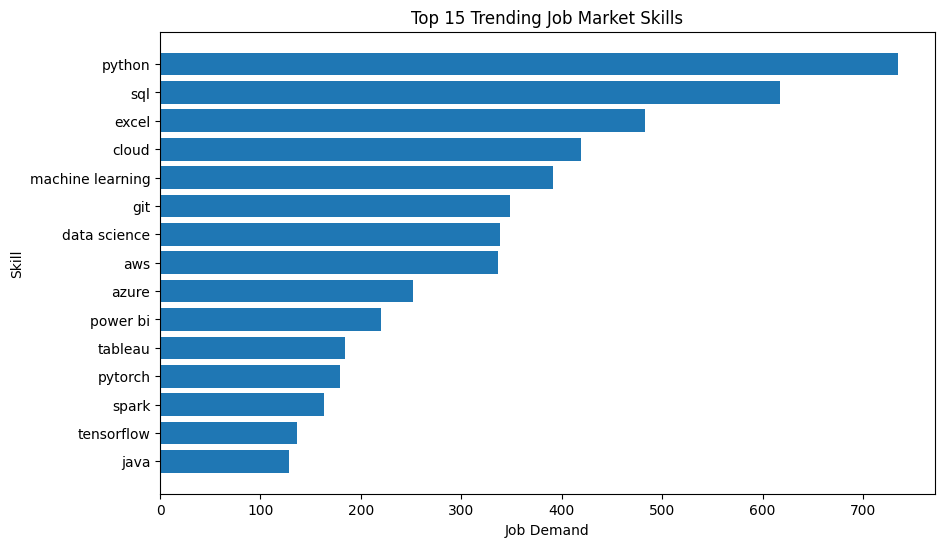

In [ ]:
top_skills = skill_df.head(15)
plt.figure(figsize=(10,6))
plt.barh(top_skills['Skill'], top_skills['Demand_Count'])
plt.xlabel("Job Demand")
plt.ylabel("Skill")
plt.title("Top 15 Trending Job Market Skills")
plt.gca().invert_yaxis()
plt.show()


AI Skills Recommendation System (Ready Code)

In [ ]:
job_skill_map = {
    "data scientist": ['python','sql','machine learning','deep learning','nlp','pandas','power bi'],
    "machine learning engineer": ['python','machine learning','deep learning','tensorflow','pytorch','sql'],
    "data analyst": ['python','sql','excel','power bi','tableau','statistics'],
    "software engineer": ['python','java','c++','git','linux','docker'],
    "web developer": ['html','css','javascript','react','node','flask'],
    "cloud engineer": ['aws','azure','cloud','docker','kubernetes','linux'],
    "devops engineer": ['docker','kubernetes','aws','linux','git','ci/cd'],
    "ai engineer": ['python','deep learning','nlp','computer vision','tensorflow','pytorch']
}
def recommend_skills(job_role):
    job_role = job_role.lower()
    if job_role in job_skill_map:
        return job_skill_map[job_role]
    else:
        return ["No recommendation available for this role"]
print("Recommended skills for Data Scientist:")
recommend_skills("data scientist")


Recommended skills for Data Scientist:


['python',
 'sql',
 'machine learning',
 'deep learning',
 'nlp',
 'pandas',
 'power bi']